In [441]:
import pandas as pd
import numpy as np
import shapefile as shp
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from pandas import DataFrame

In [442]:
house_data = pd.read_csv('Group096.csv', 'r', delimiter=',')

In [443]:
house_data

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID826814319,1/54 Emmaline St,1,u,370000.0,23/04/2016,1.0,1.0,0.0,109.0,-37.76350,144.99340
1,ID816863451,8 Leonard St,5,h,890000.0,16/04/2016,2.0,2.0,596.0,47.0,-37.74870,145.05220
2,ID901058735,3/81 Lower Plenty Rd,2,u,635000.0,18/03/2017,1.0,1.0,203.0,59.0,-37.74320,145.06310
3,ID690392903,1 Alma St,4,h,1436000.0,3/09/2017,3.0,3.0,511.0,97.0,-37.75788,144.90487
4,ID803852759,63 Saltley St,3,h,995000.0,20/05/2017,1.0,0.0,669.0,49.0,-37.83030,144.86790
5,ID393231032,1/121 Anderson Rd,1,u,200000.0,20/05/2017,1.0,1.0,1175.0,49.0,-37.78490,144.82720
6,ID444174185,91 Market Rd,3,h,472000.0,3/06/2017,1.0,0.0,700.0,69.0,-37.89363,144.65693
7,ID712353948,30 Davidson St,5,h,925000.0,24/09/2016,3.0,4.0,922.0,5.0,-37.69610,144.98650
8,ID220114082,1 Robert St,4,h,1230000.0,9/09/2017,2.0,2.0,787.0,59.0,-37.98616,145.08139
9,ID620961320,32 Cumberland St,3,h,770000.0,9/09/2017,1.0,2.0,608.0,59.0,-37.77388,144.84369


In [444]:
sf = shp.Reader("VIC_LOCALITY_POLYGON_shp.dbf")
sfRec = sf.records()

In [445]:
suburb = [each[6] for each in sfRec]

In [446]:
suburb[:5]

['UNDERBOOL', 'NURRAN', 'WOORNDOO', 'DEPTFORD', 'YANAC']

In [447]:
location_record = sf.shapeRecords()

In [448]:
suburb_shape = {}

for i in range(len(location_record)):
    subShape = Polygon(location_record[i].shape.points)
    suburb_shape[sfRec[i][6]] = subShape

In [449]:
len(suburb_shape)

2957

In [450]:
suburb_shape

{'UNDERBOOL': <shapely.geometry.polygon.Polygon at 0x24c5537ce48>,
 'NURRAN': <shapely.geometry.polygon.Polygon at 0x24c5537cd68>,
 'WOORNDOO': <shapely.geometry.polygon.Polygon at 0x24c5537c0f0>,
 'DEPTFORD': <shapely.geometry.polygon.Polygon at 0x24c5537cf98>,
 'YANAC': <shapely.geometry.polygon.Polygon at 0x24c5537cda0>,
 'MINIMAY': <shapely.geometry.polygon.Polygon at 0x24c5537cfd0>,
 'GLEN FORBES': <shapely.geometry.polygon.Polygon at 0x24c5537cf60>,
 'ADAMS ESTATE': <shapely.geometry.polygon.Polygon at 0x24c5537cef0>,
 'DIMBOOLA': <shapely.geometry.polygon.Polygon at 0x24c5537ce10>,
 'CANNUM': <shapely.geometry.polygon.Polygon at 0x24c5537cdd8>,
 'WALLUP': <shapely.geometry.polygon.Polygon at 0x24c55149400>,
 'MURRA WARRA': <shapely.geometry.polygon.Polygon at 0x24c55149630>,
 'KALKEE': <shapely.geometry.polygon.Polygon at 0x24c551491d0>,
 'WAIL': <shapely.geometry.polygon.Polygon at 0x24c55149438>,
 'PIMPINIO': <shapely.geometry.polygon.Polygon at 0x24c551494a8>,
 'DOOEN': <shap

In [451]:
location_record[0].shape.points

[[141.74552399, -35.07228701],
 [141.74552471, -35.07201624],
 [141.74748471, -35.06367123],
 [141.74909525, -35.05681288],
 [141.74917403, -35.05647197],
 [141.75887404, -35.05225699],
 [141.77005396, -35.04914101],
 [141.77057401, -35.04899703],
 [141.76823304, -35.04349501],
 [141.76757096, -35.04270197],
 [141.76709398, -35.03982199],
 [141.76544215, -35.03808514],
 [141.76547768, -35.03782986],
 [141.76408494, -35.03523684],
 [141.76398063, -35.03505673],
 [141.76387633, -35.03487661],
 [141.75923139, -35.02629546],
 [141.77479178, -35.02631526],
 [141.77477947, -35.02789069],
 [141.79121543, -35.02632192],
 [141.79143466, -35.02629765],
 [141.79143596, -35.04874003],
 [141.79351097, -35.04729598],
 [141.79428796, -35.04709498],
 [141.79636183, -35.04970131],
 [141.79864596, -35.05329199],
 [141.79782903, -35.05527899],
 [141.79795996, -35.056872],
 [141.79605705, -35.05895805],
 [141.79644599, -35.06340397],
 [141.79743197, -35.06573301],
 [141.79758596, -35.06874604],
 [141.7995

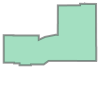

In [452]:
suburb_shape['CANNUM']

In [453]:
house_data.iterrows

<bound method DataFrame.iterrows of               ID                Address  Rooms Type      Price        Date  \
0    ID826814319       1/54 Emmaline St      1    u   370000.0  23/04/2016   
1    ID816863451           8 Leonard St      5    h   890000.0  16/04/2016   
2    ID901058735   3/81 Lower Plenty Rd      2    u   635000.0  18/03/2017   
3    ID690392903              1 Alma St      4    h  1436000.0   3/09/2017   
4    ID803852759          63 Saltley St      3    h   995000.0  20/05/2017   
5    ID393231032      1/121 Anderson Rd      1    u   200000.0  20/05/2017   
6    ID444174185           91 Market Rd      3    h   472000.0   3/06/2017   
7    ID712353948         30 Davidson St      5    h   925000.0  24/09/2016   
8    ID220114082            1 Robert St      4    h  1230000.0   9/09/2017   
9    ID620961320       32 Cumberland St      3    h   770000.0   9/09/2017   
10   ID240468868    182 Williamstown Rd      3    h   900000.0  12/08/2017   
11   ID833693029            

In [454]:
location_list = []
for each in house_data.iterrows():
    location_list.append((each[1][11], each[1][10]))

In [455]:
len(location_list)

720

In [456]:
len(suburb_shape)

2957

In [457]:
location_list[0]

(144.9934, -37.7635)

In [458]:
suburb_shape['CANNUM'].contains(Point(location_list[0]))

False

In [459]:
suburbs_list = []
for each in location_list:
    found = False
    for item in suburb_shape.keys():
        if suburb_shape[item].contains(Point(each)):
            suburbs_list.append(item)
            found = True
            break
    if found == True:
        pass
    else:
        print(each)
        suburbs_list.append('not available')

In [460]:
len(item)

13

In [461]:
len(suburbs_list)

720

In [462]:
house_data['Suburbs'] = suburbs_list

In [463]:
house_data['Year'] = [each[-4:] for each in house_data['Date']]

In [464]:
councils= open('councils.txt','r')
councils_raw = councils.readlines()
councils.close()

In [465]:
councils_raw[:10]

["BANYULE : ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington']\n",
 "BRIMBANK : ['Altona', 'Altona North', 'Armadale', 'Ascot Vale']\n",
 "DAREBIN : ['Ashburton', 'Ashwood', 'Avondale Heights', 'Balaclava']\n",
 "HOBSONS BAY : ['Balwyn', 'Balwyn North', 'Bentleigh', 'Bentleigh East']\n",
 "HUME : ['Box Hill', 'Braybrook', 'Brighton', 'Brighton East']\n",
 "MARIBYRNONG : ['Brunswick', 'Brunswick West', 'Bulleen', 'Burwood']\n",
 "MELBOURNE : ['Camberwell', 'Canterbury', 'Carlton North', 'Carnegie']\n",
 "MELTON : ['Caulfield', 'Caulfield North', 'Caulfield South', 'Chadstone']\n",
 "MOONEE VALLEY : ['Clifton Hill', 'Coburg', 'Coburg North', 'Collingwood']\n",
 "MORELAND : ['Doncaster', 'Eaglemont', 'Elsternwick', 'Elwood']\n"]

In [466]:
import re

In [467]:
councils_raw = [each.strip('\n') for each in councils_raw]

In [468]:
councils_dict = {}
for each in councils_raw:
    key = each.split(': ')[0].strip(' ')
    value = re.findall("\'([a-zA-Z ]+)\'", each)
    valuepro = [each.upper() for each in value]
    councils_dict[key] = valuepro

In [469]:
suburball = []
for k,v in councils_dict.items():
    suburball += v

In [470]:
for each in suburbs_list:
    if each not in suburball:
        print(each)

In [471]:
len(suburball)

317

In [472]:
crime_info = pd.read_excel('crimebylocationdatatable-yearending31march2016.xlsx', sheet_name=1)

In [473]:
crime_info

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Table 1. Number of offences by geographic area...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [474]:
crime_info.drop('Unnamed: 0', axis=1, inplace=True)

In [475]:
crime_title = crime_info.iloc[18]

In [476]:
crime_title

Unnamed: 1    Apr - Mar reference period
Unnamed: 2                 Police Region
Unnamed: 3           Police Service Area
Unnamed: 4         Local Government Area
Unnamed: 5          CSA Offence Division
Unnamed: 6       CSA Offence Subdivision
Unnamed: 7                 Offence Count
Unnamed: 8                       LGA ERP
Unnamed: 9                 Victorian ERP
Name: 18, dtype: object

In [501]:
crime_data = crime_info.iloc[19:]

In [502]:
crime_title[0] = 'Year'
crime_title[3] = 'Suburb'

In [503]:
crime_data.columns = crime_title.values

In [504]:
crime_data = crime_data.reset_index(drop=True)

In [505]:
crime_data

,Year,Police Region,Police Service Area,Suburb,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
6,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
7,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
8,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521
9,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,938,123600,5632521


In [482]:
counl_list = []
for each in suburbs_list:
    if_location = False
    for key,value in councils_dict.items():
        if each in value:
            correct_council = key
            if_location = True
            break
            
    if found == True:
        counl_list.append(correct_council)
    else:
        counl_list.append('NaN')

In [496]:
def get_df_then_calculate(original_df, sold_year, local_area, crime_type):
    
    if crime_type == 'crime_A_average':
        new_crime_type = 'A Crimes against the person'
    elif crime_type == 'crime_B_average':
        new_crime_type = 'B Property and deception offences'
    elif crime_type == 'crime_C_average':
        new_crime_type = 'C Drug offences'
    
    year_selector = (original_df['Year'] == sold_year-1) | (original_df['Year'] == sold_year-2) | (original_df['Year'] == sold_year-3)
    area_selector = original_df['Suburb'] == local_area
    crime_selector = original_df['CSA Offence Division'] == new_crime_type
    
    query_df = original_df[year_selector & area_selector & crime_selector]

    result = query_df['Offence Count'].sum()/3
    
    return result

In [497]:
for crime in ['crime_A_average', 'crime_B_average', 'crime_C_average']:
    calculate_average = []
    for i in range(len(counl_list)):
        result = get_df_then_calculate(crime_data, int(house_data.iloc[i]['Year']), counl_list[i], crime)
        calculate_average.append(result)
    house_data[crime] = calculate_average

In [498]:
house_median = house_data.groupby(['Type', 'Rooms','Bathroom', 'Car', 'Year', 'Suburbs']).median()

In [499]:
overPriced_list = []
for i in range(len(house_data)):
    info = house_data.iloc[i]
    median_level = house_median.loc[info ['Type'], info ['Rooms'], info ['Bathroom'], info ['Car'], info ['Year'], info ['Suburbs']]['Price']
    if info ['Price'] > median_level:
        overPriced_list.append(1)
    else:
        overPriced_list.append(0)

In [500]:
overPriced_list.count(1)

49

In [490]:
house_data['over_priced'] = overPriced_list

In [491]:
stopsstation1 = pd.read_csv('gtfs/1/google_transit/stops.txt')

In [492]:
stopsstation2= pd.read_csv('gtfs/2/google_transit/stops.txt')

In [493]:
len(stopsstation2)

222

In [435]:
list(stopsstation1['stop_name']).index( 'Southern Cross Railway Station (Melbourne City)')

7

In [436]:
stopsstation1.iloc[7]

stop_id                                                20043
stop_name    Southern Cross Railway Station (Melbourne City)
stop_lat                                            -37.8183
stop_lon                                             144.953
Name: 7, dtype: object

In [437]:
list(stopsstation2['stop_name']).index( 'Southern Cross Railway Station (Melbourne City)')

210

In [438]:
stopsstation2.iloc[210]

stop_id                                                22180
stop_name    Southern Cross Railway Station (Melbourne City)
stop_lat                                            -37.8179
stop_lon                                             144.951
Name: 210, dtype: object

In [ ]:
stops = pd.concat([stopsstation1, stopsstation2], axis=0)
stops = stops.reset_index(drop=True)

In [ ]:
len(stops)

In [ ]:
tripsplan1 = pd.read_csv('gtfs/1/google_transit/trips.txt')
tripsplan2 = pd.read_csv('gtfs/2/google_transit/trips.txt')
trips = pd.concat([tripsplan1,tripsplan2])
trips = trips.reset_index(drop=True)
timestable1 = pd.read_csv('gtfs/1/google_transit/stop_times.txt')
timestable2 = pd.read_csv('gtfs/2/google_transit/stop_times.txt')
times = pd.concat([timestable1,timestable2])
times = times.reset_index(drop=True)
calendarrole1 = pd.read_csv('gtfs/1/google_transit/calendar.txt')
calendarrole2 = pd.read_csv('gtfs/2/google_transit/calendar.txt')
calendar = pd.concat([calendarrole1,calendarrole2])
calendar = calendar.reset_index(drop=True)

In [ ]:
calendar['sum'] = calendar['monday'] + calendar['tuesday'] + \
                            calendar['wednesday'] + calendar['thursday'] + calendar['friday']

In [ ]:
valid_service = calendar[calendar['sum'] == 5]['service_id'].values

In [ ]:
trips_weekday_selector = [True if each in valid_service else False for each in trips['service_id']]

In [ ]:
trips_weekday_selector

In [ ]:
valid_weekday_trip = trips[trips_weekday_selector]['trip_id'].values

In [ ]:
len(valid_weekday_trip)

In [ ]:
times_weekday = [True if each in valid_weekday_trip else False for each in times['trip_id']]

In [ ]:
valid_weektime = times[times_weekday]

In [ ]:
len(valid_weektime)

In [ ]:
old_arrtime = valid_weektime['arrival_time']
new_arrtime = ['0' + str(int(each[:2])-24) + each[2:] if int(each[:2]) > 23 else each for each in old_arrtime]
old_departime = valid_weektime['departure_time']
new_departime = ['0' + str(int(each[:2])-24) + each[2:] if int(each[:2]) > 23 else each for each in old_departime]

In [ ]:
valid_weekday_time['arrival_time'] = new_arrtime
valid_weekday_time['departure_time'] = new_departime

In [ ]:
len(times)

In [ ]:
sc_selector = (valid_weekday_time['stop_id'] == 20043) | (valid_weekday_time['stop_id'] == 22180)
direct_trip = set(valid_weekday_time[sc_selector]['trip_id'])
direct_trip_selector = [True if each in direct_trip else False for each in valid_weekday_time['trip_id']]
new_valid_weekday_time = valid_weekday_time[direct_trip_selector]

In [404]:
len(new_valid_weekday_time)

45546

In [405]:
def get_trip_to_sc(df):
    
    start_time = pd.to_datetime('07:00:00')
    end_time = pd.to_datetime('09:30:00')
    current = df.iloc[0]['trip_id']
    temp_result = []
    final_result = []
    to_sc = True
    
    for each in df.iterrows():
        if each[1][0] == current:
            same_trip = True
            current = each[1][0]
        else:
            same_trip = False
            current = each[1][0]
        
        if same_trip == False:
            to_sc = True
        
        if to_sc == True:
            if start_time <= pd.to_datetime(each[1][2]) <= end_time:
                temp_result.append([each[1][0], each[1][2], each[1][3]])
            
        if each[1][3] == 20043 or each[1][3] == 22180:
            sc_time = pd.to_datetime(each[1][1])
            if temp_result != []:
                for item in temp_result:
                    time_gap_delta = sc_time - pd.to_datetime(item[1])
                    time_gap_minute = time_gap_delta.seconds/60
                    final_result.append(item + [time_gap_minute])
            to_sc = False
            temp_result = []
            
    return final_result

In [406]:
valid_station = get_trip_to_sc(new_valid_weekday_time)

In [407]:
valid_station = pd.DataFrame(valid_station,columns=['trip_id', 'departure_time', 'stop_id', 'travel_time'])

In [408]:
travel_time_df = valid_station.groupby('stop_id').mean()

In [409]:
len(travel_time_df)

287

In [410]:
station_set = set(valid_station['stop_id'])

In [411]:
station_set

{15351,
 15353,
 17204,
 19841,
 19842,
 19843,
 19844,
 19845,
 19846,
 19847,
 19848,
 19849,
 19850,
 19851,
 19852,
 19853,
 19854,
 19855,
 19856,
 19857,
 19858,
 19859,
 19860,
 19861,
 19862,
 19863,
 19864,
 19865,
 19866,
 19867,
 19868,
 19869,
 19870,
 19871,
 19872,
 19876,
 19877,
 19878,
 19879,
 19880,
 19881,
 19882,
 19883,
 19884,
 19885,
 19886,
 19887,
 19888,
 19889,
 19890,
 19891,
 19892,
 19893,
 19894,
 19895,
 19896,
 19897,
 19898,
 19899,
 19900,
 19901,
 19902,
 19903,
 19904,
 19905,
 19906,
 19908,
 19913,
 19914,
 19915,
 19916,
 19917,
 19918,
 19919,
 19920,
 19921,
 19922,
 19923,
 19924,
 19925,
 19926,
 19927,
 19928,
 19929,
 19930,
 19931,
 19932,
 19933,
 19934,
 19935,
 19936,
 19937,
 19938,
 19939,
 19940,
 19941,
 19942,
 19943,
 19944,
 19945,
 19946,
 19947,
 19948,
 19949,
 19950,
 19951,
 19952,
 19953,
 19954,
 19955,
 19956,
 19957,
 19958,
 19959,
 19960,
 19961,
 19962,
 19963,
 19964,
 19965,
 19966,
 19967,
 19968,
 19969,
 19970,


In [412]:
len(station_set)

287

In [413]:
stop_selector = [True if each in station_set else False for each in stops['stop_id']]

In [414]:
valid_stops = stops[stop_selector]

In [415]:
valid_stops

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165
5,20020,Ardeer Railway Station (Ardeer),-37.783065,144.802188
6,20029,Craigieburn Railway Station (Craigieburn),-37.601925,144.943306
7,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
9,20288,Ararat Railway Station (Ararat),-37.282205,142.936914
10,20289,Avenel Railway Station (Avenel),-36.893648,145.229515


In [416]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat_1, long_1, lat_2, long_2):
# approximate radius of earth in km
    R = 6378

    lat1 = radians(lat_1)
    lon1 = radians(long_1)
    lat2 = radians(lat_2)
    lon2 = radians(long_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return round(distance*1000,2)

In [291]:
def get_distance_list(target_lat, target_long, stops_df):
    distance_list = []
    for row in stops_df.iterrows():
        stop_id = row[1][0]
        distance = calculate_distance(target_lat, target_long, row[1][2], row[1][3])
        distance_list.append([stop_id,distance])
    distance_list.sort(key=lambda x: x[1])
    return distance_list

In [292]:
train_station_id = []
distance_to_train_station = []
travel_min_to_CBD = []

for each in house_data.iterrows():
    lat = each[1][10]
    long = each[1][11]
    distance_list = get_distance_list(lat, long, valid_stops)
    nearest_station = distance_list[0][0]
    nearest_station_dist = distance_list[0][1]
    train_station_id.append(nearest_station)
    distance_to_train_station.append(nearest_station_dist)
    travel_min_to_CBD.append(travel_time_df.loc[nearest_station]['travel_time'])
    

In [293]:
house_data['train_station_id'] = train_station_id
house_data['distance_to_train_station'] = distance_to_train_station
house_data['travel_min_to_CBD'] = travel_min_to_CBD

In [294]:
house_data

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Longtitude,Suburbs,Year,crime_A_average,crime_B_average,crime_C_average,over_priced,train_station_id,distance_to_train_station,travel_min_to_CBD
0,ID826814319,1/54 Emmaline St,1,u,370000.0,23/04/2016,1.0,1.0,0.0,109.0,...,144.99340,NORTHCOTE,2016,136.333333,302.666667,42.000000,0,20015,328.63,23.300000
1,ID816863451,8 Leonard St,5,h,890000.0,16/04/2016,2.0,2.0,596.0,47.0,...,145.05220,HEIDELBERG HEIGHTS,2016,1150.666667,7827.000000,922.333333,0,19935,1194.36,29.823529
2,ID901058735,3/81 Lower Plenty Rd,2,u,635000.0,18/03/2017,1.0,1.0,203.0,59.0,...,145.06310,ROSANNA,2017,885.000000,1901.000000,227.666667,0,19936,270.00,31.750000
3,ID690392903,1 Alma St,4,h,1436000.0,3/09/2017,3.0,3.0,511.0,97.0,...,144.90487,ABERFELDIE,2017,817.666667,1779.666667,181.000000,0,22253,1018.38,18.333333
4,ID803852759,63 Saltley St,3,h,995000.0,20/05/2017,1.0,0.0,669.0,49.0,...,144.86790,SOUTH KINGSVILLE,2017,987.333333,2150.333333,212.000000,0,19995,1585.98,14.333333
5,ID393231032,1/121 Anderson Rd,1,u,200000.0,20/05/2017,1.0,1.0,1175.0,49.0,...,144.82720,ALBION,2017,298.000000,735.000000,154.000000,0,22241,642.95,15.850000
6,ID444174185,91 Market Rd,3,h,472000.0,3/06/2017,1.0,0.0,700.0,69.0,...,144.65693,WERRIBEE,2017,98.666667,190.666667,19.000000,0,19921,738.08,35.142857
7,ID712353948,30 Davidson St,5,h,925000.0,24/09/2016,3.0,4.0,922.0,5.0,...,144.98650,RESERVOIR,2016,824.666667,1890.333333,159.333333,0,20008,2240.05,38.222222
8,ID220114082,1 Robert St,4,h,1230000.0,9/09/2017,2.0,2.0,787.0,59.0,...,145.08139,PARKDALE,2017,938.333333,6892.666667,553.333333,0,19864,889.10,47.066667
9,ID620961320,32 Cumberland St,3,h,770000.0,9/09/2017,1.0,2.0,608.0,59.0,...,144.84369,SUNSHINE NORTH,2017,1412.000000,6364.000000,699.333333,0,20004,1722.53,26.375000


In [295]:
schoolfile = open('schools.xml','r')
prischool_content = schoolfile.read()
schoolfile.close()

In [296]:
prischool_content = re.sub(r'\n    ', '', prischool_content)

In [297]:
school_list = re.findall(r'<School_Name>(.*?)</School_Name><School_Type>(.*?)</School_Type>[\d\D]*?<X>(.*?)</X><Y>(.*?)</Y>',prischool_content)

In [298]:
school_list

[('Alberton Primary School', 'Primary', '146.666601', '-38.617713'),
 ('Allansford and District Primary School',
  'Primary',
  '142.590393',
  '-38.386281'),
 ('Avoca Primary School', 'Primary', '143.475649', '-37.084502'),
 ('Avenel Primary School', 'Primary', '145.234722', '-36.901368'),
 ('Warrandyte Primary School', 'Primary', '145.21398', '-37.742675'),
 ('Belmont Primary School', 'Primary', '144.342099', '-38.170672'),
 ('Bacchus Marsh Primary School', 'Primary', '144.4431207', '-37.67302961'),
 ('Ballarat Primary School (Dana Street)',
  'Primary',
  '143.853936',
  '-37.56401278'),
 ('Wodonga Primary School', 'Primary', '146.88982', '-36.129214'),
 ('Berwick Primary School', 'Primary', '145.354417', '-38.044094'),
 ('Beaufort Primary School', 'Primary', '143.3817175', '-37.43852098'),
 ('Cheltenham Primary School', 'Primary', '145.054635', '-37.968608'),
 ('Cudgee Primary School', 'Primary', '142.650844', '-38.347938'),
 ('Newport Lakes Primary School', 'Primary', '144.878345'

In [299]:
len(school_list)

2254

In [300]:
primary_list = []
secondary_list = []
for each in school_list:
    new_each = [each[0], each[1], float(each[2]), float(each[3])]
    if new_each[1] == 'Primary':
        primary_list.append(new_each)
    elif new_each[1] == 'Secondary':
        secondary_list.append(new_each)

In [301]:
len(primary_list)

1556

In [302]:
len(secondary_list)

343

In [508]:
import requests

In [509]:
page_content = requests.get('http://www.schoolcatchment.com.au/?p=12301')

In [510]:
page_content.text

'<!DOCTYPE html>\n<html lang="en-US" class="no-js">\n<head>\n\t<script async src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- SchoolCatchment Sidebar -->\n<ins class="adsbygoogle"\n     style="display:block"\n     data-ad-client="ca-pub-3991833096608295"\n     data-ad-slot="1042533966"\n     data-ad-format="auto"\n     data-full-width-responsive="true"></ins>\n<script>\n(adsbygoogle = window.adsbygoogle || []).push({});\n</script>\n<script async src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<script>\n     (adsbygoogle = window.adsbygoogle || []).push({\n          google_ad_client: "ca-pub-3991833096608295",\n          enable_page_level_ads: true\n     });\n</script>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\n\t<link rel="profile" href="http://gmpg.org/xfn/11">\n\t\t<link rel="pingback" href="http://www.schoolcatchment.com.au/xmlrpc.php">\n\t\t<script>(function(html){html.cl

In [306]:
primary_school = re.findall(r'<td class="column-1">(\d{,3})</td><td class="column-2">(.*?)</td>', page_content.text)

In [307]:
primary_school

[('1', "Presbyterian Ladies' College"),
 ('2', 'Haileybury College'),
 ('3', 'Ballarat Clarendon College'),
 ('4', 'Fitzroy Community School'),
 ('5', "Fintona Girls' School"),
 ('6', 'Huntingtower School'),
 ('7', 'Beverley Hills Primary School'),
 ('8', 'Oakleigh South Primary School'),
 ('9', 'Scotch College'),
 ('10', 'Serpell Primary School'),
 ('11', 'Camberwell Grammar School'),
 ('12', "Mentone Girls' Grammar School"),
 ('13', 'St Andrews Christian College'),
 ('14', 'Christ Church Grammar School'),
 ('15', 'Waverley Christian College'),
 ('16', 'Balwyn Primary School'),
 ('17', 'Erasmus School'),
 ('18', 'Lighthouse Christian College Cranbourne'),
 ('19', 'Glendal Primary School'),
 ('20', 'Thomastown East Primary School'),
 ('21', 'Doncaster Gardens Primary School'),
 ('22', "Korowa Anglican Girls' School"),
 ('23', 'Carey Baptist Grammar School'),
 ('24', 'Firbank Grammar School'),
 ('25', 'The Knox School'),
 ('26', 'Southmoor Primary School'),
 ('27', 'Loreto Mandeville Ha

In [308]:
len(secondary_list)

343

In [309]:
secondary_list

[['Mount Erin Secondary College', 'Secondary', 145.14663, -38.174118],
 ['Edgars Creek Secondary College', 'Secondary', 145.005071, -37.609492],
 ['Cobden Technical School', 'Secondary', 143.0636059, -38.32403633],
 ['Lyndhurst Secondary College', 'Secondary', 145.271028, -38.075386],
 ['Daylesford Secondary College', 'Secondary', 144.151851, -37.33466597],
 ['Dromana Secondary College', 'Secondary', 145.013582, -38.342636],
 ['Grovedale College', 'Secondary', 144.327441, -38.210399],
 ['Irymple Secondary College', 'Secondary', 142.1647031, -34.23232674],
 ['Crusoe 7-10 Secondary College', 'Secondary', 144.23367, -36.788647],
 ['Peter Lalor Secondary College', 'Secondary', 145.0131559, -37.66690584],
 ['Lilydale Heights College', 'Secondary', 145.3414068, -37.7458221],
 ['Staughton College', 'Secondary', 144.568689, -37.708365],
 ['Chaffey Secondary College', 'Secondary', 142.147985, -34.19573],
 ['Bentleigh Secondary College', 'Secondary', 145.059798, -37.927357],
 ['Mount Clear Colle

In [310]:
len(set([each[1] for each in primary_school]))

471

In [311]:
 primary_school[1][1]

'Haileybury College'

In [312]:
 primary_school[1][0]

'2'

In [313]:
def remove_duplicated(school_list):
    unique = set()
    temp_result = {}
    for each in school_list:
        if each[1] not in unique:
            temp_result[each[1]] = each[0]
            unique.add(each[1])
        else:
            pass
    return temp_result

In [314]:
primary_cleaned = remove_duplicated(primary_school)

In [315]:
secondrankfile =open('secondary-school-ranking.html','r', encoding='UTF-8')
seco_content = secondrankfile.read()
secondrankfile.close()

In [316]:
seco_content = re.sub(r'\n', '', seco_content)

In [317]:
secondary_school = re.findall(r'<li><div>([\d\D]{4,}?)</div><div>(.*?)</div>.*?</li>',seco_content)

In [318]:
len(secondary_school)

584

In [319]:
secondary_school

[('Academy of Mary Immaculate', '144'),
 ('Adass Israel School', '534'),
 ('Advance College of Education', '535'),
 ('Aitken College', '194'),
 ('Al Siraat College', '280'),
 ('Al-Taqwa College', '400'),
 ('Albert Park College', '131'),
 ('Albury Wodonga Comm College', '536'),
 ('Alexandra Secondary College', '481'),
 ('Alia College', '500'),
 ('Alice Miller School', '127'),
 ('Alkira Secondary College', '328'),
 ('Alphington Grammar School', '86'),
 ('Antonine College', '482'),
 ('Apollo Bay P-12 College', '18'),
 ('Aquinas College', '151'),
 ('Ararat Secondary College', '486'),
 ('Ashwood High School', '241'),
 ('Assumption College', '301'),
 ('Auburn High School', '167'),
 ('Australian Internatl Academy', '501'),
 ('Ave Maria College', '111'),
 ('Avila College', '102'),
 ('Bacchus Marsh College', '496'),
 ('Bacchus Marsh Grammar', '147'),
 ('Baimbridge College', '452'),
 ('Bairnsdale Secondary College', '513'),
 ('Balcombe Grammar School', '156'),
 ('Ballarat Christian College', '40

In [320]:
secondary_cleaned = {}
for each in secondary_school:
    if each[0] not in secondary_cleaned:
        secondary_cleaned[each[0]] = each[1]
    else:
        old_value = secondary_cleaned[each[0]]
        if each[1] < old_value:
            secondary_cleaned[each[0]] = each[1]

In [321]:
def get_school_distance(target_lat, target_long, school_list):
    distance_list = []
    for each in school_list:
        school_name = each[0]
        distance = calculate_distance(target_lat, target_long, each[3], each[2])
        distance_list.append([school_name,distance])
    distance_list.sort(key=lambda x: x[1])
    return distance_list

In [322]:
def get_ranking(school, ranking):
    if school in ranking:
        return ranking[school]
    else:
        return 'not ranked'

In [323]:
closest_primary_school = []
distance_to_closest_primary = []
primary_school_ranking = []

closest_secondary_school = []
distance_to_closest_secondary = []
secondary_school_ranking = []

for each in house_data.iterrows():
    lat = each[1][10]
    long = each[1][11]
    
    primary_distance_list = get_school_distance(lat, long, primary_list)
    nearest_primary = primary_distance_list[0][0]
    nearest_primary_dist = primary_distance_list[0][1]
    nearest_primary_ranks = get_ranking(nearest_primary,primary_cleaned)
    
    secondary_distance_list = get_school_distance(lat, long, secondary_list)
    nearest_secondary = secondary_distance_list[0][0]
    nearest_secondary_dist = secondary_distance_list[0][1]
    nearest_secondary_ranks = get_ranking(nearest_secondary,secondary_cleaned)
    
    closest_primary_school.append(nearest_primary)
    distance_to_closest_primary.append(nearest_primary_dist)
    primary_school_ranking.append(nearest_primary_ranks)
    closest_secondary_school.append(nearest_secondary)
    distance_to_closest_secondary.append(nearest_secondary_dist)
    secondary_school_ranking.append(nearest_secondary_ranks)

In [324]:
house_data['closest_primary_school'] = closest_primary_school
house_data['distance_to_closest_primary'] = distance_to_closest_primary
house_data['primary_school_ranking'] = primary_school_ranking
house_data['closest_secondary_school'] = closest_secondary_school
house_data['distance_to_closest_secondary'] = distance_to_closest_secondary
house_data['secondary_school_ranking'] = secondary_school_ranking

In [333]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 26 columns):
ID                               720 non-null object
Address                          720 non-null object
Rooms                            720 non-null int64
Type                             720 non-null object
Price                            720 non-null float64
Date                             720 non-null object
Bathroom                         720 non-null float64
Car                              720 non-null float64
Landsize                         720 non-null float64
Age                              720 non-null float64
Lattitude                        720 non-null float64
Longtitude                       720 non-null float64
Suburbs                          720 non-null object
crime_A_average                  720 non-null float64
crime_B_average                  720 non-null float64
crime_C_average                  720 non-null float64
over_priced                      720 n

In [1]:
#house_data.drop('Year', axis=1, inplace=True)

In [2]:
house_data.to_csv("Group096_solution.csv")

NameError: name 'house_data' is not defined

In [336]:
house_data.iloc[:3]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,over_priced,train_station_id,distance_to_train_station,travel_min_to_CBD,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking
0,ID826814319,1/54 Emmaline St,1,u,370000.0,23/04/2016,1.0,1.0,0.0,109.0,...,0,20015,328.63,23.300000,Thornbury Primary School,945.94,not ranked,Santa Maria College,1104.94,137
1,ID816863451,8 Leonard St,5,h,890000.0,16/04/2016,2.0,2.0,596.0,47.0,...,0,19935,1194.36,29.823529,St Pius X School,556.50,not ranked,Our Lady of Mercy College,1699.84,90
2,ID901058735,3/81 Lower Plenty Rd,2,u,635000.0,18/03/2017,1.0,1.0,203.0,59.0,...,0,19936,270.00,31.750000,Rosanna Primary School,869.01,367,Our Lady of Mercy College,1686.57,90


In [337]:
import matplotlib.pyplot as plt
%matplotlib inline

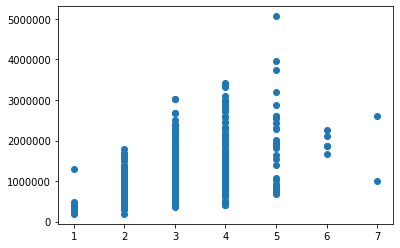

In [338]:
plt.scatter(house_data['Rooms'], house_data['Price'])

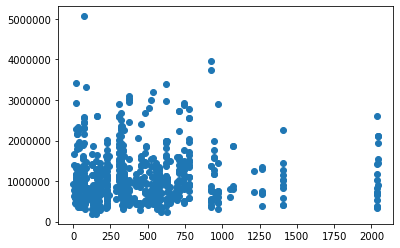

In [339]:
plt.scatter(house_data['crime_C_average'], house_data['Price'])

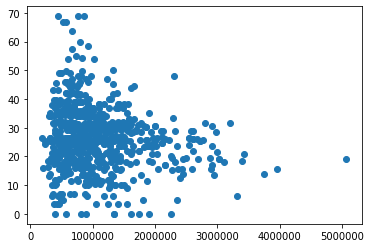

In [340]:
plt.scatter(house_data['Price'], house_data['travel_min_to_CBD'])

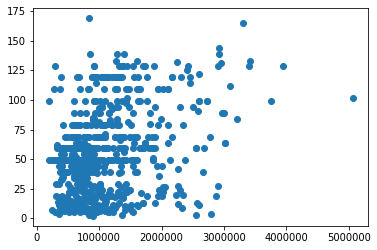

In [341]:
plt.scatter(house_data['Price'], house_data['Age'])

In [342]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

In [343]:
house_data.columns

Index(['ID', 'Address', 'Rooms', 'Type', 'Price', 'Date', 'Bathroom', 'Car',
       'Landsize', 'Age', 'Lattitude', 'Longtitude', 'Suburbs',
       'crime_A_average', 'crime_B_average', 'crime_C_average', 'over_priced',
       'train_station_id', 'distance_to_train_station', 'travel_min_to_CBD',
       'closest_primary_school', 'distance_to_closest_primary',
       'primary_school_ranking', 'closest_secondary_school',
       'distance_to_closest_secondary', 'secondary_school_ranking'],
      dtype='object')

In [344]:
X_train = house_data[['Rooms', 'crime_C_average', 'travel_min_to_CBD', 'Age']]
y_train = house_data['Price']

In [345]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
r2_score(y_train, lin_reg.predict(X_train))

0.453306037190191

In [346]:
def std_normalization(x):
    minus_mean = x - np.mean(x)
    result = minus_mean/np.std(x)
    return result

In [347]:
def min_max(x):
    min_value = x.min()
    max_value = x.max()
    return (x - min_value) / (max_value - min_value)

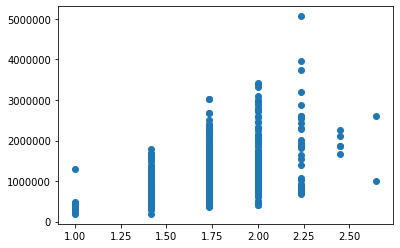

In [348]:
plt.scatter(np.sqrt(house_data['Rooms']), house_data['Price'])

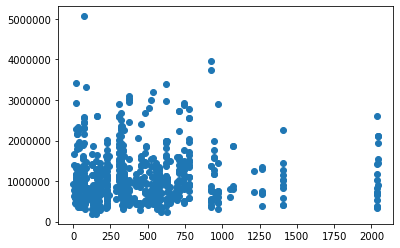

In [349]:
plt.scatter(house_data['crime_C_average'], house_data['Price'])

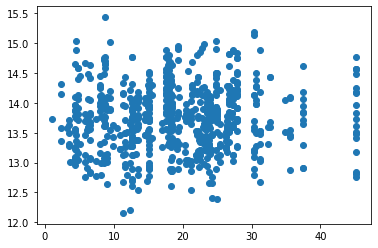

In [350]:
plt.scatter(np.sqrt(house_data['crime_C_average']), np.log(house_data['Price']))

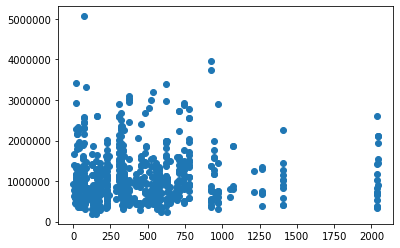

In [351]:
plt.scatter(house_data['crime_C_average'], house_data['Price'])

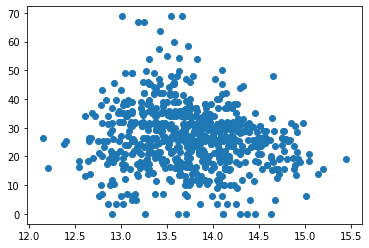

In [352]:
plt.scatter(np.log(house_data['Price']), house_data['travel_min_to_CBD'])

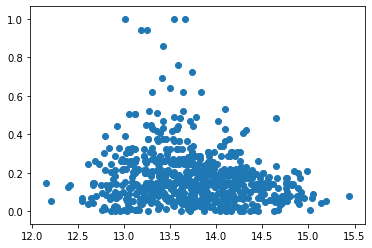

In [353]:
plt.scatter(np.log(house_data['Price']), np.power(min_max(house_data['travel_min_to_CBD']),2))

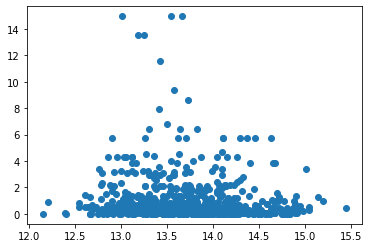

In [354]:
plt.scatter(np.log(house_data['Price']), np.power(std_normalization(house_data['travel_min_to_CBD']),2))

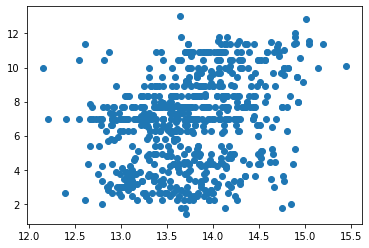

In [355]:
plt.scatter(np.log(house_data['Price']), np.sqrt(house_data['Age']))

In [356]:
X_train = house_data[['Rooms', 'crime_C_average', 'travel_min_to_CBD', 'Age']]
y_train = house_data['Price']

In [357]:
y_train = np.log(y_train)

In [358]:
X_train['travel_min_to_CBD']  = std_normalization(house_data['travel_min_to_CBD'])
X_train['Age'] = std_normalization(house_data['Age'])
X_train['crime_C_average'] = std_normalization(house_data['crime_C_average'])
X_train['Rooms'] = std_normalization(house_data['Rooms'])

C:\Users\pnj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pnj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pnj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [359]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, np.log(np.log(y_train)))
r2_score(np.log(np.log(y_train)), lin_reg.predict(X_train))

0.4905386653287692